In [3]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [4]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)


Coefficients:  [[ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
   -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
    2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
   -5.09349120e-01]]

Intercepts:  [ 30.28894834]

Training Error:  10.8207870483
Testing Error:  12.1557134648


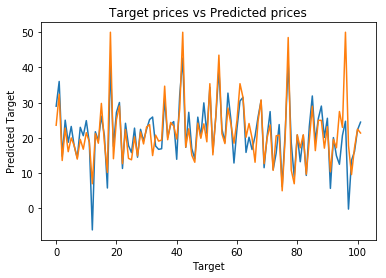

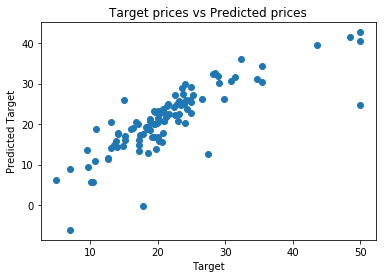

In [5]:
# Sources

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://matplotlib.org/api/pyplot_api.html
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
# http://www.bigdataexaminer.com/2016/03/31/how-to-run-linear-regression-in-python-scikit-learn/
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Task 1-1: use linear regression in sklearn

# creating linear regression model object with default parameters
model = linear_model.LinearRegression()

# fitting the model with training X,Y data. We are training the model with the training data at this time
model.fit(train_data, train_target)

# Task 1-2: show intercept and coefficients
print()
print('Coefficients: ', model.coef_)
print()
print('Intercepts: ', model.intercept_)

# Task 1-3: show errors on training dataset and testing dataset

# Here we are getting a prediction using the training data
trained_results = model.predict(train_data)

# Here we are getting a prediction using the testing data
tested_results = model.predict(test_data)

# Print out both data sets error based on model fitted using the training data
print()
print('Training Error: ', metrics.mean_squared_error(train_target, trained_results) / 2)
print('Testing Error: ', metrics.mean_squared_error(test_target, tested_results) / 2)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing data set

# set x axis label
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
plt.plot(model.predict(np.matrix(test_data)))
# plot the true values of the test data
plt.plot(np.matrix(test_target))
# show the chart
plt.show()

# set x axis label
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
plt.scatter(np.matrix(test_target), tested_results)
# show the chart
plt.show()


Intercepts:  [ 22.79653465]

Coefficients:  [[-0.996232  ]
 [ 0.69558769]
 [ 0.28047684]
 [ 0.71933958]
 [-2.02678678]
 [ 3.14074199]
 [-0.17447147]
 [-3.08322662]
 [ 2.24869616]
 [-1.76573775]
 [-2.03984933]
 [ 1.13874218]
 [-3.61718128]]


Training Error:  10.820787048327789
Testing Error:  12.155713464846677


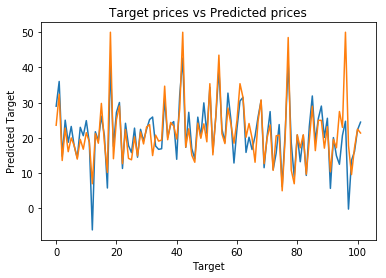

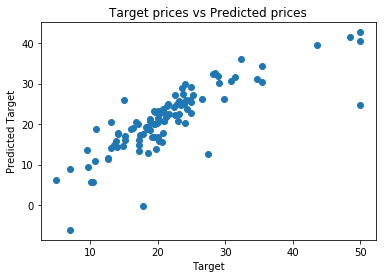

In [15]:
# Sources

# http://anwarruff.com/normal-equation/
# http://stackoverflow.com/questions/14107481/what-does-x-t-in-python-do

# Task 2-1: Implement a function solving normal equation 

# loss function of linear regression
def lossFunc(N, features, targets, weights):  
    t = np.matrix(targets)
    X = np.matrix(features)
    w = np.matrix(weights)
    error = t - X.dot(w)
    return  np.asscalar((1/(2*N)) * (error.T * error))

# Inputs: Training data (X) and training label (target/y)
# Output: Weights
def myNormalEqualFun(X,y):
    return (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
    
# Task 2-2: Implement a function performing prediction

# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    #102, 1
    # print(w.shape)
    # print(w.T.shape)
    # print(X.shape)
    # print(X.dot(w).T.shape)
    #*************************************************************************************************************************transpose does nothing
    # return np.matrix(np.dot(np.matrix(w).getT(), np.matrix(X).getT())).getT()
    # return w.T.dot(X)
    # return w.dot(X)
    # print ("DEBUG 2" + str (w.T.dot(X.T).shape))
    return X.dot(w)
    # return np.transpose(np.dot(np.transpose(np.matrix(w)), np.transpose(np.matrix(X))))

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
print()
print('Intercepts: ', w[0])
print()
print('Coefficients: ', w[1:])
print()

# Task 2-4: show errors on training dataset and testing dataset
training_error = lossFunc(len(train_target), train_data_intercept, train_target, w)
testing_error = lossFunc(len(test_target), test_data_intercept, test_target, w)

print()
print('Training Error: ', training_error)
print('Testing Error: ', testing_error)

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset

# set x axis label
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
plt.plot(myPredictFun(np.matrix(test_data_intercept), np.matrix(w)))
# plot the true values of the test data
plt.plot(np.matrix(test_target))
# show the chart
plt.show()

# set x axis label
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
plt.scatter(np.matrix(test_target), np.matrix(myPredictFun(test_data_intercept, w)))
# show the chart
plt.show()


Intercepts:  [[ 15.32656618]]

Coefficients:  [[-0.62999737]
 [ 0.19930472]
 [-0.53056449]
 [ 0.9568164 ]
 [-0.4276973 ]
 [ 2.90938321]
 [-0.13515554]
 [-0.75048136]
 [-0.10499016]
 [-0.50216951]
 [-1.48178317]
 [ 0.78689479]
 [-2.44190485]]


Training Error:  10.820787048330006
Testing Error:  12.155714999157885


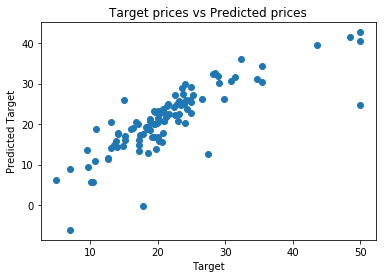

In [29]:
# Sources

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html#numpy.random.rand
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy.random.randint
# http://www.pyimagesearch.com/2016/10/10/gradient-descent-with-python/

# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Task 3-1: Implement a function performing gradient descent

# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    
    # w = np.random.uniform(size=(X.shape[1],1))
    w = np.zeros((X.shape[1],1))
    
    for i in range(0, numItrs):
        error = (y - X.dot(w))
        gradient = ((X.T.dot(error)) / X.shape[0])
        w = w + learning_rate * gradient
        
    return w

# Task 3-2: Implement a function performing prediction

# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X.dot(w)

# Task 3-3: show intercept and coefficents

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

print()
print('Intercepts: ', w[0])
print()
print('Coefficients: ', w[1:])
print()

# Task 3-4: show errors on training dataset and testing dataset

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(np.matrix(train_data_intercept), np.matrix(train_target),0.2,1000)

training_error = lossFunc(len(train_target), train_data_intercept, train_target, w)
testing_error = lossFunc(len(test_target), test_data_intercept, test_target, w)

print()
print('Training Error: ', training_error)
print('Testing Error: ', testing_error)

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset

# set x axis label
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
plt.scatter(np.matrix(test_target), np.matrix(myPredictFun(test_data_intercept, w)))
# show the chart
plt.show()